#Smart House Automation System

In [3]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [4]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Define the base class Device
class Device:
    def __init__(self, device_id, device_type, status):
        self.device_id = device_id
        self.device_type = device_type
        self.status = status

    def get_status(self):
        return self.status

    def set_status(self, status):
        self.status = status

# Define the subclass Thermostat
class Thermostat(Device):
    def __init__(self, device_id, status, temperature):
        super().__init__(device_id, 'Thermostat', status)
        self.temperature = temperature

    def get_temperature(self):
        return self.temperature

    def set_temperature(self, temperature):
        self.temperature = temperature

# Define the subclass Light
class Light(Device):
    def __init__(self, device_id, status, brightness):
        super().__init__(device_id, 'Light', status)
        self.brightness = brightness

    def get_brightness(self):
        return self.brightness

    def set_brightness(self, brightness):
        self.brightness = brightness

# Define the subclass SecurityCamera
class SecurityCamera(Device):
    def __init__(self, device_id, status, recording_status):
        super().__init__(device_id, 'SecurityCamera', status)
        self.recording_status = recording_status

    def get_recording_status(self):
        return self.recording_status

    def set_recording_status(self, recording_status):
        self.recording_status = recording_status

# Define the day/night function
def day_night(hour):
    if 7 < hour <= 18:
        turning_light = "OFF"
        shift = "SUNRISE"
    else:
        turning_light = "ON"
        shift = "SUNSET"
    return turning_light, shift

# Define the thermostat adjustment function
def adjust_thermostat(temp):
    if temp < 22:
        action = "Increase Temperature "
        thermostat_setting = "HEATING ON"
    elif 22 <= temp <= 26:
        action = "Maintained Temperature"
        thermostat_setting = "HEATING OFF"
    else:
        action = "Decrease temperature"
        thermostat_setting = "COOLING ON"

    return thermostat_setting, action

# Create instances of the devices
thermo_status = "ON"  # Initial status for thermostat
light_status = "ON"   # Initial status for light
security_camera_status = "ON"   # Initial status for security camera
recording_status = "RECORDING"  # Initial recording status for security camera
temp = np.random.randint(20, 40)  # Initial random temperature
brightens = np.random.randint(68, 100)  # Initial random brightness

thermostat_instance = Thermostat(device_id=1, status=thermo_status, temperature=temp)
light_instance = Light(device_id=2, status=light_status, brightness=brightens)
security_camera_instance = SecurityCamera(device_id=3, status=security_camera_status, recording_status=recording_status)

# Define the function to log device data
def log_device_data(thermostat_instance, light_instance, security_camera_instance):
    # Get current time
    now = datetime.now()

    # Get data from device instances
    given_data = [thermostat_instance.get_temperature(), light_instance.get_brightness(), security_camera_instance.get_recording_status()]

    # Determine day/night status
    hour_time = int(now.strftime("%H"))
    turning_light, shift = day_night(hour_time)

    # Adjust thermostat
    thermostat_setting, action = adjust_thermostat(temp)

    # Append data to CSV file
    file_path = "/drive/MyDrive/Python_Project/output.csv"  # Define the file path
    with open(file_path, 'a') as file:
        file.write(str(given_data[0]) + ",")
        file.write(str(given_data[1]) + ",")
        file.write(given_data[2] + ",")
        file.write(now.strftime("%H:%M:%S") + ",")
        file.write(turning_light + ",")
        file.write(shift + ",")
        file.write(thermostat_setting + ",")
        file.write(action + ",")
        file.write(light_status + ",")
        file.write(thermo_status + ",")
        file.write(security_camera_status + "\n")

    print("Data appended successfully")
try:
  # Main loop to periodically log data
  while True:
      # Generate random values for temperature and brightness
      temp = np.random.randint(20, 40)
      brightens = np.random.randint(68, 100)

      # Generate random actions for light and security camera
      light_action, security_camera_action, thermo_action = np.random.randint(0, 2, size=3)

      # Determine status based on actions
      if light_action == 0:
          light_status = "OFF"
      else:
          light_status = "ON"

      if thermo_action == 0:
          thermo_status = "OFF"
      else:
          thermo_status = "ON"

      if security_camera_action == 0:
          security_camera_status = "OFF"
          recording_status = "NOT RECORDING"
      else:
          security_camera_status = "ON"
          recording_status = "RECORDING"

      # Update device instances
      thermostat_instance.set_status(thermo_status)
      thermostat_instance.set_temperature(temp)

      light_instance.set_status(light_status)
      light_instance.set_brightness(brightens)

      security_camera_instance.set_status(security_camera_status)
      security_camera_instance.set_recording_status(recording_status)

      # Log device data
      log_device_data(thermostat_instance, light_instance, security_camera_instance)



      # Wait for 60 seconds before logging again
      time.sleep(60)

except KeyboardInterrupt:
    print("Program interrupted by user")



Data appended successfully
Program interrupted by user


In [ ]:
import pandas as pd

file_path = "/drive/MyDrive/Python_Project/output.csv"

column_names =["Temperature","Brightness","Security Cemara","Time of Update","Light","Shift","Termostart","Action","light_status","thermo_status","security_camera_status" ]
df = pd.read_csv(file_path, names=column_names)

df['Time of Update'] = pd.to_datetime(df['Time of Update'], format='%H:%M:%S').dt.time
df['Time of Update'] = pd.to_datetime(df['Time of Update'], format='%H:%M:%S')
df['Time_Interval'] = df['Time of Update'].diff().dt.total_seconds().fillna(0)
df['Time of Update'] = df['Time of Update'].dt.time

time_interval = df["Time_Interval"].median()
df['Time of Execution'] = 0
for i in range(1, len(df)):
    df.loc[i, 'Time of Execution'] = df.loc[i - 1, 'Time of Execution'] + time_interval

print(df.head())

   Temperature  Brightness Security Cemara Time of Update Light    Shift  \
0           32          93       RECORDING       12:56:00   OFF  SUNRISE   
1           23          72       RECORDING       12:57:00   OFF  SUNRISE   
2           27          70   NOT RECORDING       12:58:00   OFF  SUNRISE   
3           37          70       RECORDING       12:59:00   OFF  SUNRISE   
4           21          80       RECORDING       13:00:00   OFF  SUNRISE   

    Termostart                  Action light_status thermo_status  \
0   COOLING ON    Decrease temperature           ON           OFF   
1  HEATING OFF  Maintained Temperature           ON            ON   
2   COOLING ON    Decrease temperature          OFF           OFF   
3   COOLING ON    Decrease temperature           ON            ON   
4   HEATING ON   Increase Temperature           OFF            ON   

  security_camera_status  Time_Interval  Time of Execution  
0                     ON            0.0                  0  
1     

In [ ]:
average_temperature = df['Temperature'].mean()
max_temperature = df['Temperature'].max()
min_temperature = df['Temperature'].min()

average_brightness = df['Brightness'].mean()
max_brightness = df['Brightness'].max()
min_brightness = df['Brightness'].min()

avg_temperatue_shift = df.groupby("Shift")['Temperature'].mean()
avg_Brightness_shift = df.groupby('Shift')['Brightness'].mean()

# Find highest and lowest temperatures for each shift
max_temperatures_shifts = df.groupby('Shift')['Temperature'].max()
min_temperatures_shifts = df.groupby('Shift')['Temperature'].min()

min_Brightness_shifts = df.groupby('Shift')['Brightness'].max()
max_Brightness_shifts = df.groupby('Shift')['Brightness'].min()

light_counts = df['Light'].value_counts()


# Extract times associated with active heating or cooling
df['Time of Update'] = pd.to_datetime(df['Time of Update'], format='%H:%M:%S')

print("The Status of Time security camera is running: \n")
grouped = df.groupby('Security Cemara')['Time of Update'].apply(lambda x: x.diff().fillna(pd.Timedelta(seconds=0)).sum())

# Convert the summed time differences to hh:mm:ss format
grouped = grouped.apply(lambda x: str(x).split()[-1])

# Display results
print(grouped,"\n\n")

print("The average, maximun and minimum of the temparature throughout the day:")
print(f"Average Temperature: {average_temperature}°C")
print(f"peak value of Temperature: {max_temperature}°C")
print(f"least value of Temperature: {min_temperature}°C\n\n")

print("The average, maximun and minimum of the  Brightness throughout the day:")

print(f"Average brightness: {average_brightness}°C")
print(f"peak value of brightness: {max_brightness}°C")
print(f"least value of brightness: {min_brightness}°C\n\n")

print("The average, maximun and minimum of the  temperature throughout the shift:\n")

print(f"Average brightness: {avg_temperatue_shift}°C")
print(f"peak value of brightness: {max_temperatures_shifts}°C")
print(f"least value of brightness: {min_temperatures_shifts}°C\n\n")

print("The average, maximun and minimum of the  Brightness throughout the shift:\n")

print(f"Average brightness: {avg_Brightness_shift}")
print(f"peak value of brightness: {min_Brightness_shifts}")
print(f"least value of brightness: {max_Brightness_shifts}\n\n")

print(f"Number of times the light was on versus off:\n {light_counts}")

The Status of Time security camera is running: 

Security Cemara
NOT RECORDING    +14:30:30
RECORDING        +14:31:30
Name: Time of Update, dtype: object 


The average, maximun and minimum of the temparature throughout the day:
Average Temperature: 28.372549019607842°C
peak value of Temperature: 39°C
least value of Temperature: 20°C


The average, maximun and minimum of the  Brightness throughout the day:
Average brightness: 80.29411764705883°C
peak value of brightness: 98°C
least value of brightness: 68°C


The average, maximun and minimum of the  temperature throughout the shift:

Average brightness: Shift
SUNRISE    27.961538
SUNSET     28.800000
Name: Temperature, dtype: float64°C
peak value of brightness: Shift
SUNRISE    39
SUNSET     39
Name: Temperature, dtype: int64°C
least value of brightness: Shift
SUNRISE    20
SUNSET     20
Name: Temperature, dtype: int64°C


The average, maximun and minimum of the  Brightness throughout the shift:

Average brightness: Shift
SUNRISE    8

In [ ]:
prev_time = None
prev_status = None

print("Analysis of Periodic Status Changes in Recording System\n\n")
# Iterate over the DataFrame to find and print the time difference between status changes
for index, row in df.iterrows():
    if prev_status is not None and row['Security Cemara'] != prev_status:
        # Calculate the time difference
        time_diff = (row['Time of Update'] - prev_time).total_seconds()
        print(f"After {abs(time_diff)} seconds, the status changed from {prev_status} to {row['Security Cemara']} \n")
    # Update previous time and status for the next iteration
    prev_time = row['Time of Update']
    prev_status = row['Security Cemara']

Analysis of Periodic Status Changes in Recording System


After 60.0 seconds, the status changed from RECORDING to NOT RECORDING 

After 60.0 seconds, the status changed from NOT RECORDING to RECORDING 

After 60.0 seconds, the status changed from RECORDING to NOT RECORDING 

After 60.0 seconds, the status changed from NOT RECORDING to RECORDING 

After 60.0 seconds, the status changed from RECORDING to NOT RECORDING 

After 60.0 seconds, the status changed from NOT RECORDING to RECORDING 

After 60.0 seconds, the status changed from RECORDING to NOT RECORDING 

After 60.0 seconds, the status changed from NOT RECORDING to RECORDING 

After 60.0 seconds, the status changed from RECORDING to NOT RECORDING 

After 60.0 seconds, the status changed from NOT RECORDING to RECORDING 

After 60.0 seconds, the status changed from RECORDING to NOT RECORDING 

After 60.0 seconds, the status changed from NOT RECORDING to RECORDING 

After 60.0 seconds, the status changed from RECORDING to NOT RECOR

In [ ]:
# Calculate the total time each device is 'on'
light_on_time = df[df['light_status'] == 'ON']['Time_Interval'].sum()
thermo_on_time = df[df['thermo_status'] == 'ON']['Time_Interval'].sum()
security_camera_on_time = df[df['security_camera_status'] == 'ON']['Time_Interval'].sum()

# Calculate the total time across all devices
total_time = df['Time_Interval'].sum()

# Calculate the proportions of time for each device
light_proportion = light_on_time / total_time
thermo_proportion = thermo_on_time / total_time
security_camera_proportion = security_camera_on_time / total_time

# Create labels and proportions for the pie chart
labels = ['Light', 'Thermostat', 'Security Camera']
proportions = [light_proportion, thermo_proportion, security_camera_proportion]

value_light = df['light_status'].value_counts()['ON']
value_thermo = df['thermo_status'].value_counts()['ON']
value_security_camera = df['security_camera_status'].value_counts()['ON']
values = [value_light, value_thermo, value_security_camera]



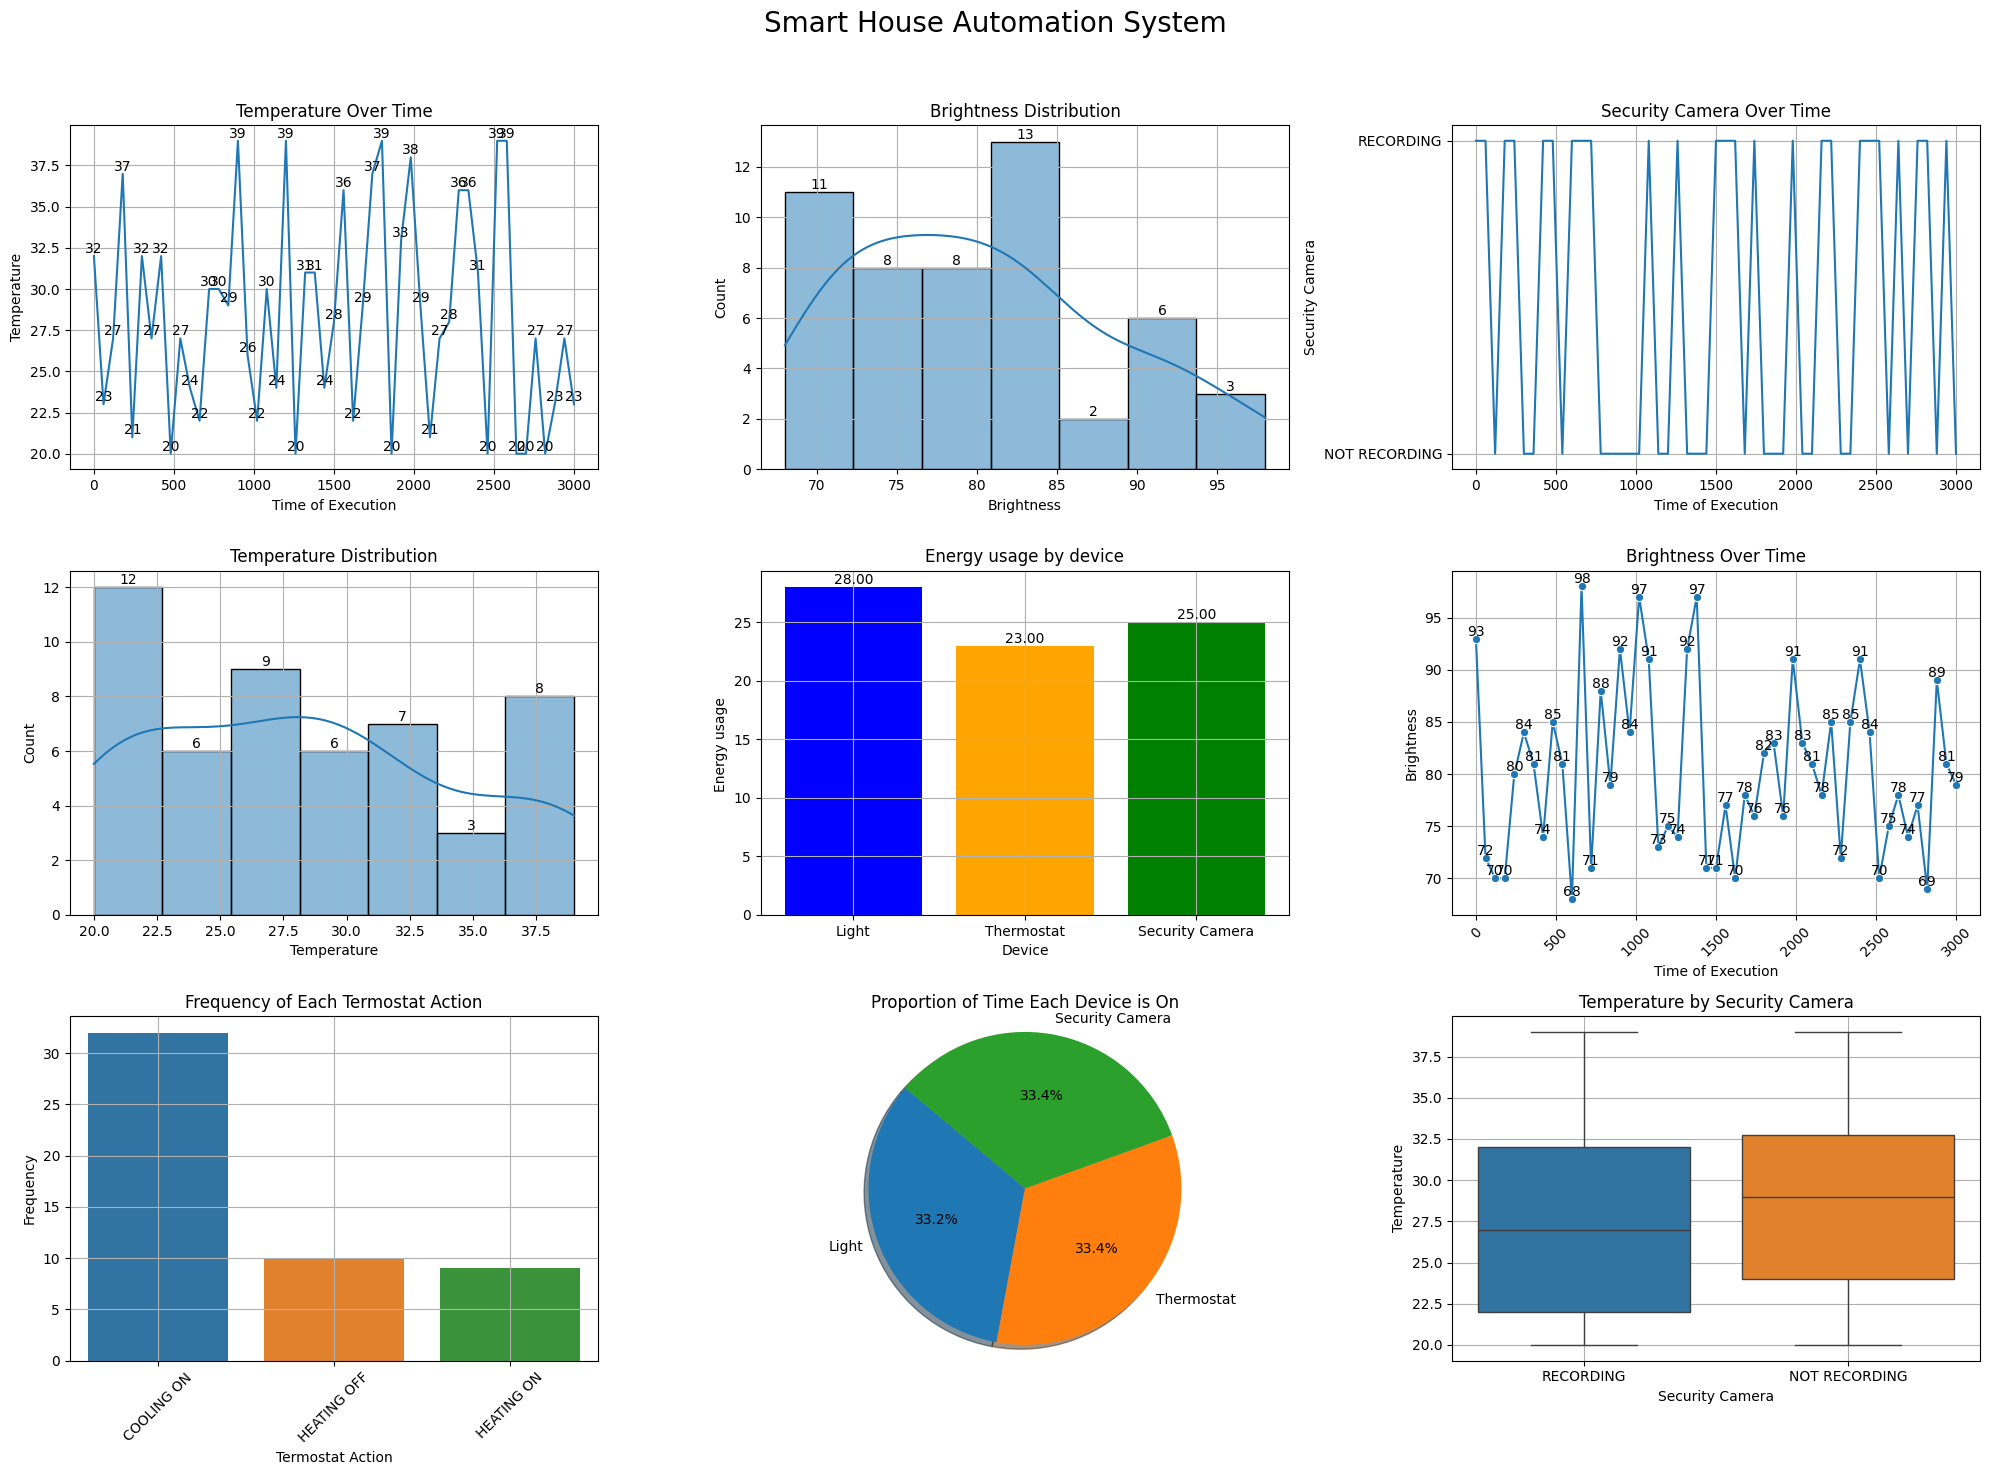

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

project_name = "Smart House Automation System\n\n"

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# Temperature Over Time
sns.lineplot(x='Time of Execution', y='Temperature', data=df, ax=axes[0, 0])
axes[0, 0].set_xlabel('Time of Execution')
axes[0, 0].set_ylabel('Temperature')
axes[0, 0].set_title('Temperature Over Time')
axes[0, 0].grid(True)
for index, row in df.iterrows():
    axes[0, 0].text(row['Time of Execution'], row['Temperature'], f'{row["Temperature"]}',
                    fontsize=10, ha='center', va='bottom')


# Brightness Distribution
sns.histplot(df['Brightness'], kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Brightness')
axes[0, 1].set_title('Brightness Distribution')
axes[0, 1].grid(True)

# Add text annotations
for p in axes[0, 1].patches:
    axes[0, 1].text(p.get_x() + p.get_width()/2., p.get_height(), f'{int(p.get_height())}',
                    fontsize=10, ha='center', va='bottom')
# Security Camera Over Time
sns.lineplot(x='Time of Execution', y='Security Cemara', data=df, ax=axes[0, 2])
axes[0, 2].set_xlabel('Time of Execution')
axes[0, 2].set_ylabel('Security Camera')
axes[0, 2].set_title('Security Camera Over Time')
axes[0, 2].grid(True)


# Temperature Distribution
sns.histplot(df['Temperature'], kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Temperature')
axes[1, 0].set_title('Temperature Distribution')
axes[1, 0].grid(True)
for p in axes[1, 0].patches:
    axes[1, 0].text(p.get_x() + p.get_width()/2., p.get_height(), f'{int(p.get_height())}',
                    fontsize=10, ha='center', va='bottom')

# energy usage by device
axes[1, 1].bar(labels, values, color=['blue', 'orange', 'green'])
axes[1, 1].set_xlabel('Device')
axes[1, 1].set_ylabel('Energy usage ')
axes[1, 1].set_title('Energy usage by device')
axes[1, 1].grid(True)
for label, value in zip(labels, values):
    axes[1, 1].text(label, value, f'{value:.2f}', fontsize=10, ha='center', va='bottom')

# Brightness Over Time with markers and grid
sns.lineplot(x='Time of Execution', y='Brightness', data=df, ax=axes[1, 2], marker='o', linestyle='-')
axes[1, 2].set_xlabel('Time of Execution')
axes[1, 2].set_ylabel('Brightness')
axes[1, 2].set_title('Brightness Over Time')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True)
for index, row in df.iterrows():
    axes[1, 2].text(row['Time of Execution'], row['Brightness'], f'{row["Brightness"]}',
                    fontsize=10, ha='center', va='bottom')

# Frequency of Each Termostat Action
sns.countplot(x='Termostart', hue='Termostart', data=df, ax=axes[2, 0])
axes[2, 0].set_xlabel('Termostat Action')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_title('Frequency of Each Termostat Action')
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].grid(True)

# Proportion of Time Each Device is On
axes[2, 1].pie(proportions, labels=labels, autopct='%1.1f%%',shadow = True, startangle=140)
axes[2, 1].set_title('Proportion of Time Each Device is On')
axes[2, 1].axis('equal')
axes[2, 1].grid(True)

# Boxplot for Security Camera
sns.boxplot(x='Security Cemara', y='Temperature', hue='Security Cemara', data=df, ax=axes[2, 2])
axes[2, 2].set_xlabel('Security Camera')
axes[2, 2].set_ylabel('Temperature')
axes[2, 2].set_title('Temperature by Security Camera')
axes[2, 2].grid(True)

fig.suptitle(project_name, fontsize=20)

plt.tight_layout()
plt.show()


